In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

# Logo-generating module
import anylogo

%matplotlib inline
plt.ion()

In [9]:
# Load energy matrix
energy_mat = pd.read_csv('crp_fullwt.26.txt',delim_whitespace=True)
energy_mat.head()

,pos,val_A,val_C,val_G,val_T
0,0,0.00,0.94,1.04,0.30
1,1,0.00,1.81,1.03,0.65
2,2,0.00,1.47,1.15,0.14
3,3,0.30,1.75,2.13,0.00
4,4,0.07,0.73,0.41,0.00


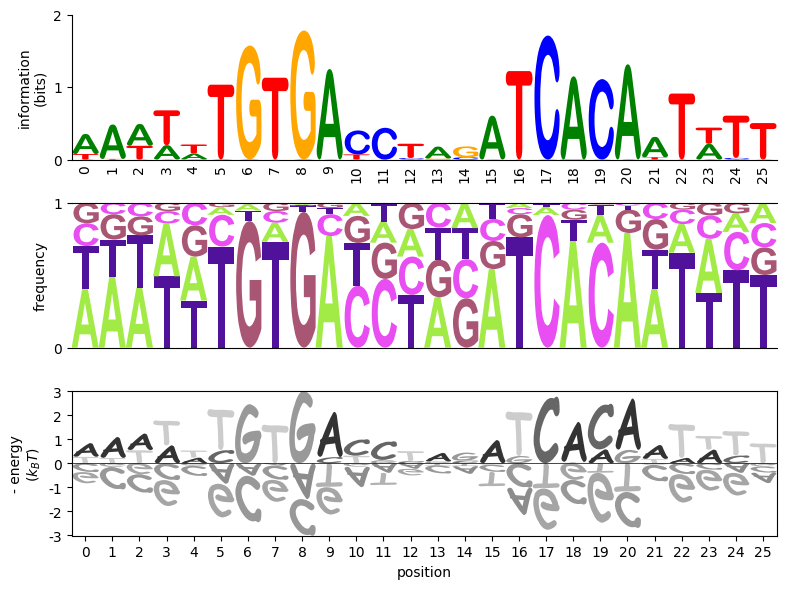

In [4]:
fig = plt.figure(figsize=[8,6])

# Plot information logo
ax = fig.add_subplot(3,1,1)
anylogo.Logo(mat=energy_mat, mat_type='energy_mat', 
             logo_type='info_logo').draw()

# Plot frequency logo
ax = fig.add_subplot(3,1,2)
anylogo.Logo(mat=energy_mat, mat_type='energy_mat', font_name='Arial Bold',
             logo_type='freq_logo', color_scheme='random', logo_style='rails', 
             stack_order='small_on_top').draw()

# Plot energy logo
ax = fig.add_subplot(3,1,3)
anylogo.Logo(mat=energy_mat, mat_type='energy_mat', 
             logo_type='energy_logo', neg_flip=True, 
             logo_style='everything', font_name='Comic Sans MS Bold', color_scheme='gray').draw()

plt.tight_layout()